<a href="https://colab.research.google.com/github/taegukang35/jejuproject/blob/main/tannangfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = '/content/drive/MyDrive/test.png'

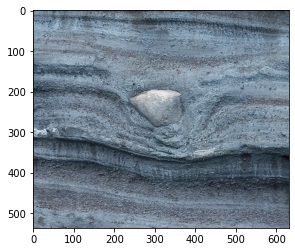

In [ ]:
image=cv2.imread(file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

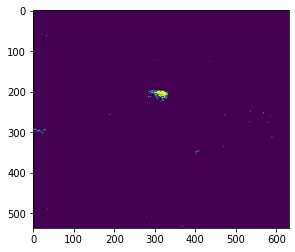

In [ ]:
gray = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
dst = cv2.bilateralFilter(gray,-1,10,10)
ret,dst = cv2.threshold(dst,220,255,cv2.THRESH_BINARY)
plt.imshow(dst)

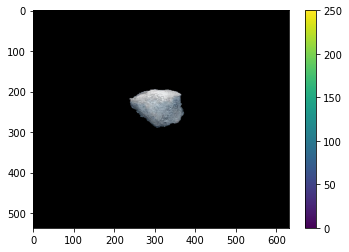

(<matplotlib.image.AxesImage at 0x7f4833ea4550>,
 None)

In [ ]:
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (100,100,300,400)
cv2.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = image*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
mask = mask2[::np.newaxis]
ret,thresh = cv2.threshold(mask,0,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]#출처: https://leechamin.tistory.com/257 [참신러닝 (Fresh-Learning):티스토리]

#Circle Fitting

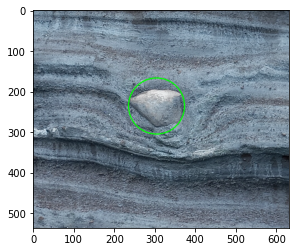

In [ ]:
(x,y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
image = cv2.circle(image,center,radius,(0,255,0),2)

plt.imshow(image)#출처: https://leechamin.tistory.com/257 [참신러닝 (Fresh-Learning):티스토리]

#K-Means Clustering

In [ ]:
def kmeansColorCluster(image, clusters, rounds):
        """
        Parameters
            image <np.ndarray> : 이미지
            clusters <int> : 클러스터 개수 (군집화 개수)
            rounds <int> : 알고리즘을 몇 번 실행할지 (보통 1)
        returns
            clustered Image <np.ndarray> : 결과 이미지
            SSE <float> : 오차 제곱 합
        """
        
        height, width = image.shape[:2]
        samples = np.zeros([ height * width, 3 ], dtype=np.float32)
        
        count = 0
        for x in range(height):
            for y in range(width):
                samples[count] = image[x][y]
                count += 1
        
        '''
        # compactness : SSE = 오차 제곱 합
        # labels : 레이블 배열 (0과 1로 표현)
        # centers : 클러스터 중심 좌표 (k개로 군집화된 색상들)
        '''
        compactness, labels, centers = cv2.kmeans(
                    samples, # 비지도 학습 데이터 정렬
                    clusters, # 군집화 개수
                    None, # 각 샘플의 군집 번호 정렬
                    # criteria : kmeans 알고리즘 반복 종료 기준 설정
                    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 
                                10000, # max_iter 
                                0.0001), # epsilon 
                    # attempts : 다른 초기 중앙값을 이용해 반복 실행할 횟수
                    attempts = rounds, 
                    # flags : 초기 중앙값 설정 방법
                    flags = cv2.KMEANS_PP_CENTERS)
        
        centers = np.uint8(centers)
        res = centers[labels.flatten()]
        
        # 결과 이미지, 초기 중앙값, 오차제곱합 반환
        return res.reshape((image.shape)), centers, round(compactness, 4)

In [ ]:
img, _, _ = kmeansColorCluster(image,2,5)

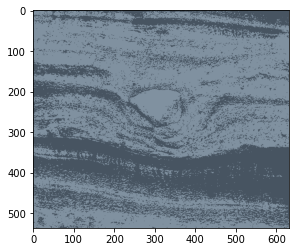